In [2]:
#Generates Growth curve and ∆OD/∆T graphs for cholesterol producing strains and wildtype
#Will Cheney 2019
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind_from_stats
from scipy.interpolate import BSpline, make_interp_spline
from scipy.optimize import curve_fit
from scipy import stats



In [3]:
#loading data
input_filename = '2020-01-29 Growth curve by d2 bb.xlsx'
plate1 = pd.read_excel(input_filename, header = None)

input_filename = 'cholesterolgrowth curve I.xlsx'
plate2 = pd.read_excel(input_filename, header = None)

In [4]:
#seperating data by strain

by4741 = plate2.iloc[[12,13,14], range(0,95)]
d2 = plate2.iloc[[15,16,17], range(0,95)]
bb = plate2.iloc[[24,25,26], range(0,95)]

In [98]:
def general_logistic(x,a,b,m,n,v):
    return a + ((b - a) / (1 + np.exp(-n*(x - m))**(1/v)))

In [67]:
def logistic(x,b,c,k):
    return b / (1.0 + np.exp(-k**(x-c)))

In [70]:
def hill(x,a,b,c,n):
    return a + ((b - a) / (1 + (c/x)**n))

In [5]:
#mean value at each time point for each strain
mean_by4741 = by4741.apply(np.mean, axis = 0)
mean_d2 = d2.apply(np.mean, axis = 0)
mean_bb = bb.apply(np.mean, axis = 0)
#mean_corrected = d2_corrected.apply(np.mean, axis = 0)

error_by4741 = by4741.apply(np.std, axis = 0)
error_d2 = d2.apply(np.std, axis = 0)
error_bb = bb.apply(np.std, axis = 0)
#error_corrected = d2_corrected.apply(np.std,axis = 0)


In [6]:
#intializing time data
time_interval = 15

time = np.array([range(len(mean_by4741))])
time = time * time_interval


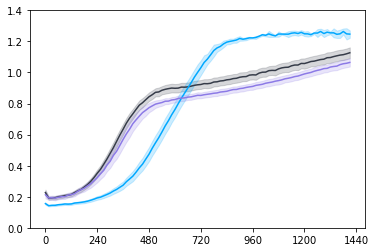

In [6]:
#ploting OD at each time point

plt.plot(time.T, mean_by4741, label = 'BY4741', color = '#353b48', zorder = 10)
plt.fill_between(time.squeeze(), mean_by4741 - error_by4741, mean_by4741 + error_by4741, alpha = 0.2, color = '#353b48', zorder = 5)

plt.plot(time.T, mean_d2, label = 'Cholesterol Alternative Loci', color = '#00a8ff', zorder = 10)
#plt.errorbar(time.T, mean_d2, yerr = error_d2)
plt.fill_between(time.squeeze(), mean_d2 - error_d2, mean_d2 + error_d2, alpha = 0.2, color = '#00a8ff', zorder = 5)

#plt.plot(time.T, d2_correct, color = 'orange')
#plt.plot(time.T, mean, label = 'Cholesterol Alternative Loci', color = '#00a8ff', zorder = 10)
#plt.errorbar(time.T, mean_d2, yerr = error_d2)
#plt.fill_between(time.squeeze(), mean_d2 - error_d2, mean_d2 + error_d2, alpha = 0.2, color = '#00a8ff', zorder = 5)


plt.plot(time.T, mean_bb, label = 'Cholesterol Native Loci', color = '#8c7ae6',zorder = 10)
#plt.errorbar(time.T, mean_bb, yerr = error_bb)
#plt.plot(time.T, mean_corrected, color = 'firebrick')
plt.fill_between(time.squeeze(), mean_bb - error_bb, mean_bb + error_bb, alpha = 0.2, color = '#8c7ae6', zorder = 5)
#plt.yscale('log')
plt.ylim(0,1.4)
plt.xticks([0,240,480,720,960,1200,1440])
fig = plt.gcf()
plt.show()

In [7]:
#figure save
fig.savefig('2020-08-03 growth growth curven',dpi = 300, bbox_inches='tight')

In [8]:
#functions to get ∆OD/∆T data
delta_time = []
for i in range(len(time[0]) - 1):

    delta_time.append((time[0][(i+1)] + time[0][i])/2)

def delta(x):
    result = []
    for i in range(len(x)-1):
        result.append(float(x[i+1] - x[i]))
    return result

def mean_std_of_series(x):
    mean = np.array([])
    std = np.array([])
    for i in range(len(x.iloc[0])):
        mean = np.append(mean, np.mean([x.iloc[0][i],x.iloc[1][i],x.iloc[2][i]]))
        std = np.append(std, np.std([x.iloc[0][i],x.iloc[1][i],x.iloc[2][i]]))
                    
    return mean,std

In [9]:
delta_by4741 = by4741.apply(delta, axis = 1)
delta_d2 = d2.apply(delta, axis = 1)
delta_bb = bb.apply(delta, axis = 1)

mean_delta_by4741,std_delta_by4741 = mean_std_of_series(delta_by4741)
mean_delta_d2, std_delta_d2 = mean_std_of_series(delta_d2)
mean_delta_bb, std_delta_bb = mean_std_of_series(delta_bb)

In [7]:
#Weighted average function to smooth deriavtive data
def weighted_average(od, theta = 0.5):
    result = []
    for i in range(len(od)):
        if not result:
            result.append(od[i])
        else:
            result.append(theta*result[-1] + (1-theta)*od[i])
            
    return result

In [10]:
average_by4741 = weighted_average(mean_delta_by4741,theta = (1- 1/4))
average_d2 = weighted_average(mean_delta_d2, theta = (1- 1/4))
average_bb = weighted_average(mean_delta_bb, theta = (1- 1/4))
#average_correct = weighted_average(delta(d2_correct),theta = (1- 1/4))

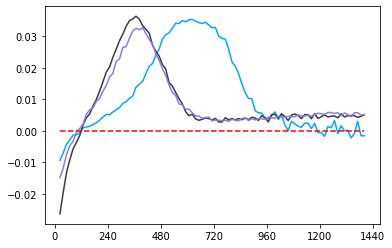

In [11]:
plt.plot(delta_time[1:], average_d2[1:], color = '#00a8ff')
plt.plot(delta_time[1:], average_by4741[1:], color = '#353b48')
plt.plot(delta_time[1:], average_bb[1:], color = '#8c7ae6')
#plt.plot(delta_time[1:], average_correct[1:], color = 'orange')


plt.plot(delta_time[1:96], [0]*len(delta_time[1:]), color = 'r', linestyle = 'dashed')
plt.xticks([0,240,480,720,960,1200,1440])

fig = plt.gcf()
plt.show()

In [70]:
fig.savefig('2020-08-03 messy derviative ',dpi = 300, bbox_inches='tight')

In [81]:
#adjusted for difference in starting OD

result = []
for i in range(3):
    growth = delta_d2.iloc[i]/d2.iloc[i][0:94]
    correct = [mean_by4741[0]]
    for i in growth:
        correct.append(correct[-1]*(1 + i))
    result.append(correct)
    
d2_corrected = pd.DataFrame(result)
mean_corrected = d2_corrected.apply(np.mean, axis = 0)


In [104]:
for i in range(len(d2_correct)):
    if d2_correct[i] >= 2*d2_correct[0]:
        print(i)
        break
#d2 28, 27, 25
#by4741 20, 20, 20

30


In [65]:
d2_fit[0]

0.14048840851315145

In [299]:
mean_delta_by4741,std_delta_by4741 = mean_std_of_series(delta_by4741)
mean_delta_d2_2, std_delta_d2_2 = mean_std_of_series(delta_d2)
mean_delta_bb, std_delta_bb = mean_std_of_series(delta_bb)
len(mean_delta_d2_2)

94

In [99]:
#fitting generalized logistic function to d2 data
#mean_d2 = mean_d2.to_numpy()
d2_opt ,d2cov = curve_fit(general_logistic, time.T.flatten(), mean_d2.flatten())

#d2 opt2.27e-1, 1.254, 6.06e2, 1.041 e-2, 1.35


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


In [100]:
d2_opt

array([ 1.43140103e-01,  1.25733466e+00,  5.72880688e+02, -7.83128440e-01,
       -8.27883076e+01])

In [101]:
xline = np.linspace(0, 1400,95)

d2_fit = general_logistic(xline,*d2_opt)
correct_parameters = d2_opt
correct_parameters[0] = mean_by4741[0]
d2_correct = general_logistic(xline, *correct_parameters)
#def general_logistic(x,a,b,q,n,v):
#    return a + ((b - a) / (1 + q*np.exp(-n*x))**(1/v))

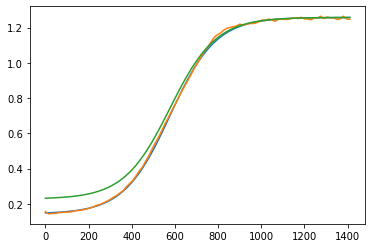

In [102]:
plt.plot(time.T,d2_fit)
plt.plot(time.T, mean_d2)
plt.plot(time.T,d2_correct)
#plt.plot(time.T, mean_by4741)
#plt.plot(time.T, mean_corrected)
plt.show()